<a href="https://colab.research.google.com/github/sunmoan/AIFFEL_quest_rs/blob/main/Mainquest/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy

951.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


957.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


963.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


968.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


974.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

import numpy as np

In [22]:
X = np.array(df_X)
print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [23]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
W = np.random.rand(X_train.shape[1])
n = np.random.rand()

print(len(W))

10


In [26]:
def model(X,W,b):
  predictions = 0
  for i in range(len(W)):
    predictions += X[:, i]*W[i]
  predictions += b
  return predictions

In [27]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [28]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [29]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [30]:
LEARNING_RATE = 0.01

In [37]:
%%timeit -n 1 -r 1
global W, b

b = 0 # Initialize b

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, Y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, Y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4232.3942
Iteration 200 : Loss 3815.5902
Iteration 300 : Loss 3794.6305
Iteration 400 : Loss 3780.9429
Iteration 500 : Loss 3767.6841
Iteration 600 : Loss 3754.7250
Iteration 700 : Loss 3742.0546
Iteration 800 : Loss 3729.6644
Iteration 900 : Loss 3717.5461
Iteration 1000 : Loss 3705.6918
Iteration 1100 : Loss 3694.0939
Iteration 1200 : Loss 3682.7449
Iteration 1300 : Loss 3671.6375
Iteration 1400 : Loss 3660.7650
Iteration 1500 : Loss 3650.1204
Iteration 1600 : Loss 3639.6974
Iteration 1700 : Loss 3629.4897
Iteration 1800 : Loss 3619.4911
Iteration 1900 : Loss 3609.6959
Iteration 2000 : Loss 3600.0982
Iteration 2100 : Loss 3590.6927
Iteration 2200 : Loss 3581.4739
Iteration 2300 : Loss 3572.4368
Iteration 2400 : Loss 3563.5763
Iteration 2500 : Loss 3554.8877
Iteration 2600 : Loss 3546.3662
Iteration 2700 : Loss 3538.0074
Iteration 2800 : Loss 3529.8069
Iteration 2900 : Loss 3521.7604
Iteration 3000 : Loss 3513.8639
Iteration 3100 : Loss 3506.1134
Iteration 3200 : 

In [38]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, Y_test)
mse


np.float64(2947.733787544822)

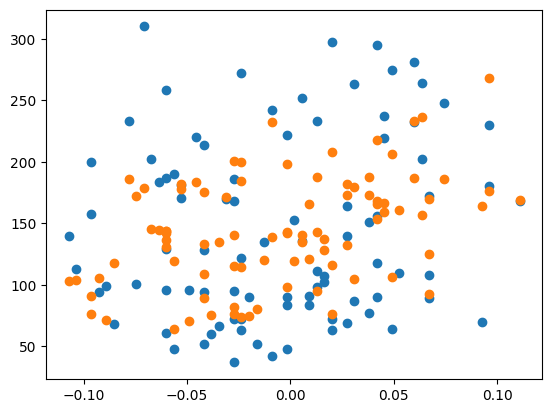

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], Y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()